In [2]:
import load_data
import preprocess_spectra
import pandas
from importlib import reload
import matplotlib.pyplot as plt
import numpy
import specplotlib
#%matplotlib inline

In [4]:

from matplotlib.widgets import RectangleSelector
def get_inds_click(tmap, xmn, xmx, ymn, ymx):
    objnum = tmap.shape[0]
    inds = (tmap[:,0] > xmn) & (tmap[:,0] < xmx) & (tmap[:,1] > ymn) & (tmap[:,1] < ymx)
    inds = numpy.arange(objnum)[inds]
    #tmp_inds = np.argsort(ws[inds])[::-1]
    #inds = inds[tmp_inds]
    return inds


def line_select_callback(eclick, erelease):
    'eclick and erelease are the press and release events'
    x1, y1 = eclick.xdata, eclick.ydata
    x2, y2 = erelease.xdata, erelease.ydata
    print("(%3.2f, %3.2f) --> (%3.2f, %3.2f)" % (x1, y1, x2, y2))
    print(" The button you used were: %s %s" % (eclick.button, erelease.button))
    global click_inds
    click_inds = get_inds_click(click_map, min(x1,x2), max(x1,x2), min(y1,y2), max(y1,y2))
      
    art = plt.scatter(click_map[click_inds,0], click_map[click_inds,1], s = 100, edgecolors='red', c='none')


def toggle_selector(event):
    print(' Key pressed.')
    if event.key in ['Q', 'q'] and toggle_selector.RS.active:
        print(' RectangleSelector deactivated.')
        toggle_selector.RS.set_active(False)
    if event.key in ['A', 'a'] and not toggle_selector.RS.active:
        print(' RectangleSelector activated.')
        toggle_selector.RS.set_active(True)
        
  

In [16]:
!ls

README.md                    data_for_nn.ipynb
SN_df_w_salt                 distances.py
SN_df_w_salt.csv             full_spectra_matrix.npy
SN_ra_dec.csv                load_data.py
Umap_10_0.001.npy            load_data.py.orig
Untitled.ipynb               master.tar.gz
Untitled1.ipynb              preprocess_spectra.py
Untitled2.ipynb              salt2.txt
Untitled3.ipynb              sfddata-master
X_SG.npy                     sn_lc.csv
__pycache__                  sncosmo.ipynb
all_spectra_tsne.ipynb       snia_constit_salt2.tsv
data                         specplotlib.py
data_exploration-Copy1.ipynb umap_0.npy
data_exploration.ipynb       x.tar
data_exploration_cfa.ipynb


In [5]:
X_SG = numpy.load('X_SG.npy')
CW = numpy.load('CW')
SN_df_w_salt = pandas.read_csv('SN_df_w_salt.csv')
nof_objects = X_SG.shape[0]
nof_objects

229

In [6]:
from astropy.cosmology import WMAP9 as cosmo
z_distmod = cosmo.distmod(SN_df_w_salt['z_CMB'].values)
SN_df_w_salt['z_distmod'] = z_distmod.value
SN_df_w_salt.head()

/Users/itamar/anaconda2/envs/avocado/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/Users/itamar/anaconda2/envs/avocado/lib/python3.5/site-packages/numpy/lib/function_base.py:2810: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


,#SN,zhel,tmax(B),+/-_x,ref.,Dm15,+/-.1_x,ref..1,M_B,+/-.2_x,...,+/-_y,m_B,+/-.1_y,x_1,+/-.2_y,c,+/-.3_y,mu,+/-.4_y,z_distmod
0,1994D,0.0029,49432.5,0.1,"B,M,SA,SN",1.37,0.03,B,-99.99,9.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1994M,0.0232,49474.5,0.9,"B,M,SA,SN",1.26,0.06,B,-19.21,0.08,...,0.001,16.274,0.021,-1.746,0.174,0.104,0.021,35.276,0.205,35.121073
2,1994S,0.0151,49518.3,0.3,"B,M,SA,SN",0.94,0.06,B,-19.55,0.09,...,0.001,14.762,0.021,0.226,0.260,-0.002,0.019,34.232,0.242,34.227370
3,1994T,0.0346,49514.4,0.4,"M,SN",1.51,0.08,SN,-99.99,9.99,...,0.001,16.914,0.027,-1.489,0.168,0.030,0.024,36.126,0.189,36.021113
4,1994ae,0.0043,49685.5,0.8,"B,M,SA,SN",0.96,0.04,B,-99.99,9.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
%matplotlib notebook

<IPython.core.display.Javascript object>


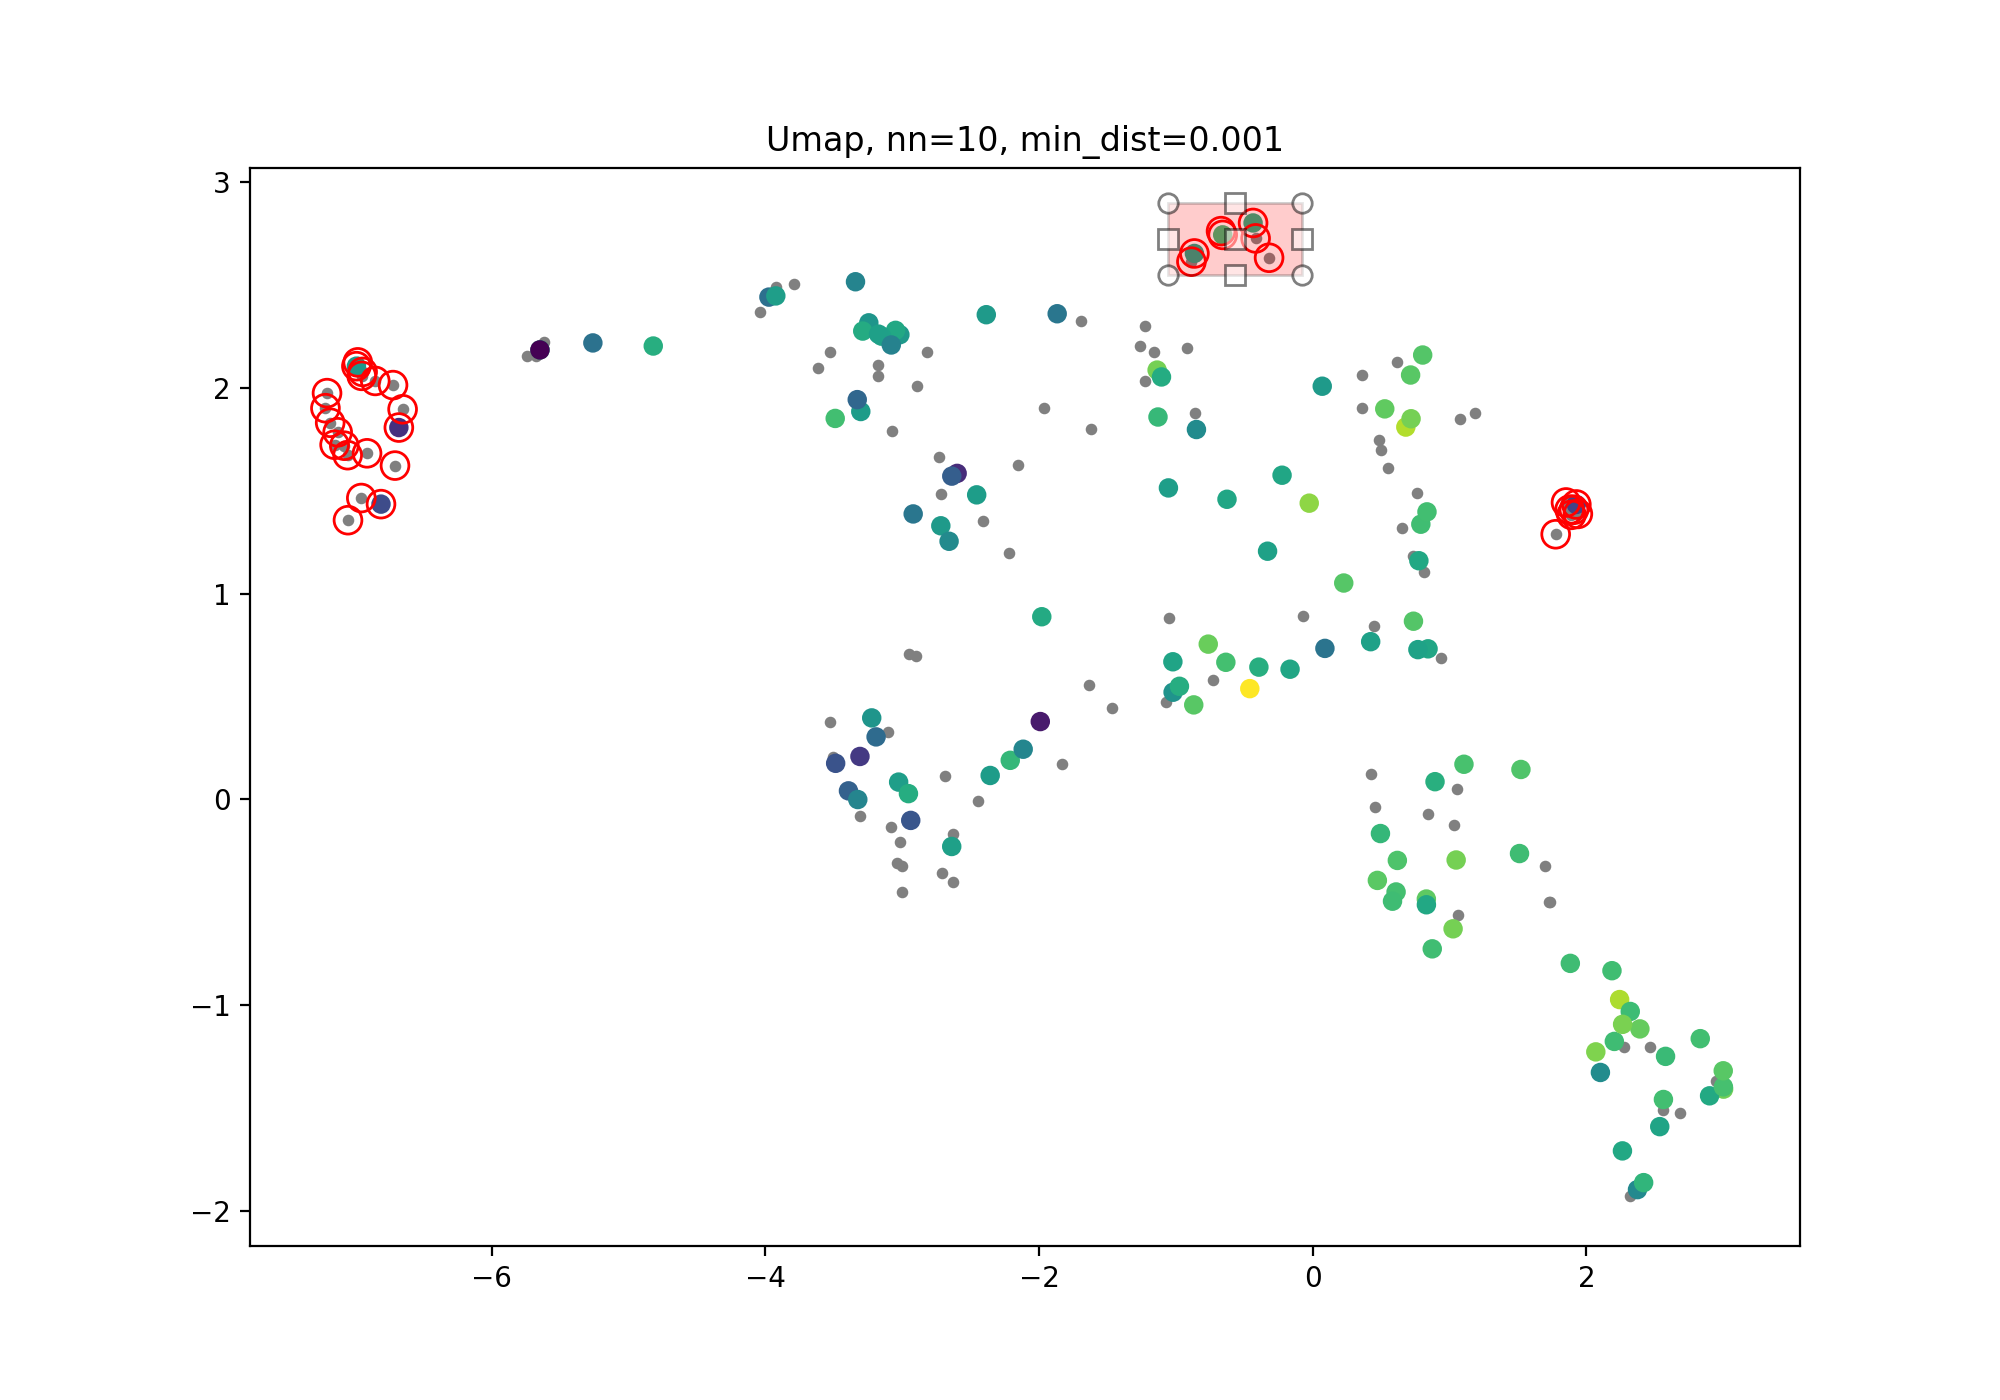

In [11]:
t = (SN_df_w_salt['z_distmod'].values - SN_df_w_salt['m_B'].values)
#plt the map in result
plt.figure(figsize=(10,7))
umapmap = numpy.load('umap_0.npy')
click_map = umapmap.copy()
plt.title("Umap, nn=%s, min_dist=%s" % (10, 0.001))
x = umapmap[:, 0]
y = umapmap[:, 1]
plt.scatter(x, y, color = 'gray', s = 10)
plt.scatter(x, y, c = t)
plt.show()
current_ax = plt.gca()
xn, xx = current_ax.get_xlim(); #print(xn, xx)
yn, yx = current_ax.get_ylim(); #print(yn, yx)
toggle_selector.RS = RectangleSelector(current_ax, line_select_callback,
                                           drawtype='box', useblit=True,
                                           button=[1, 3],  # don't use middle button
                                           minspanx=5, minspany=5,
                                       spancoords='pixels',
                                           interactive=True)
event = plt.connect('key_press_event', toggle_selector)

In [14]:
#g0 = click_inds.copy()
#g1 = click_inds.copy()

<IPython.core.display.Javascript object>


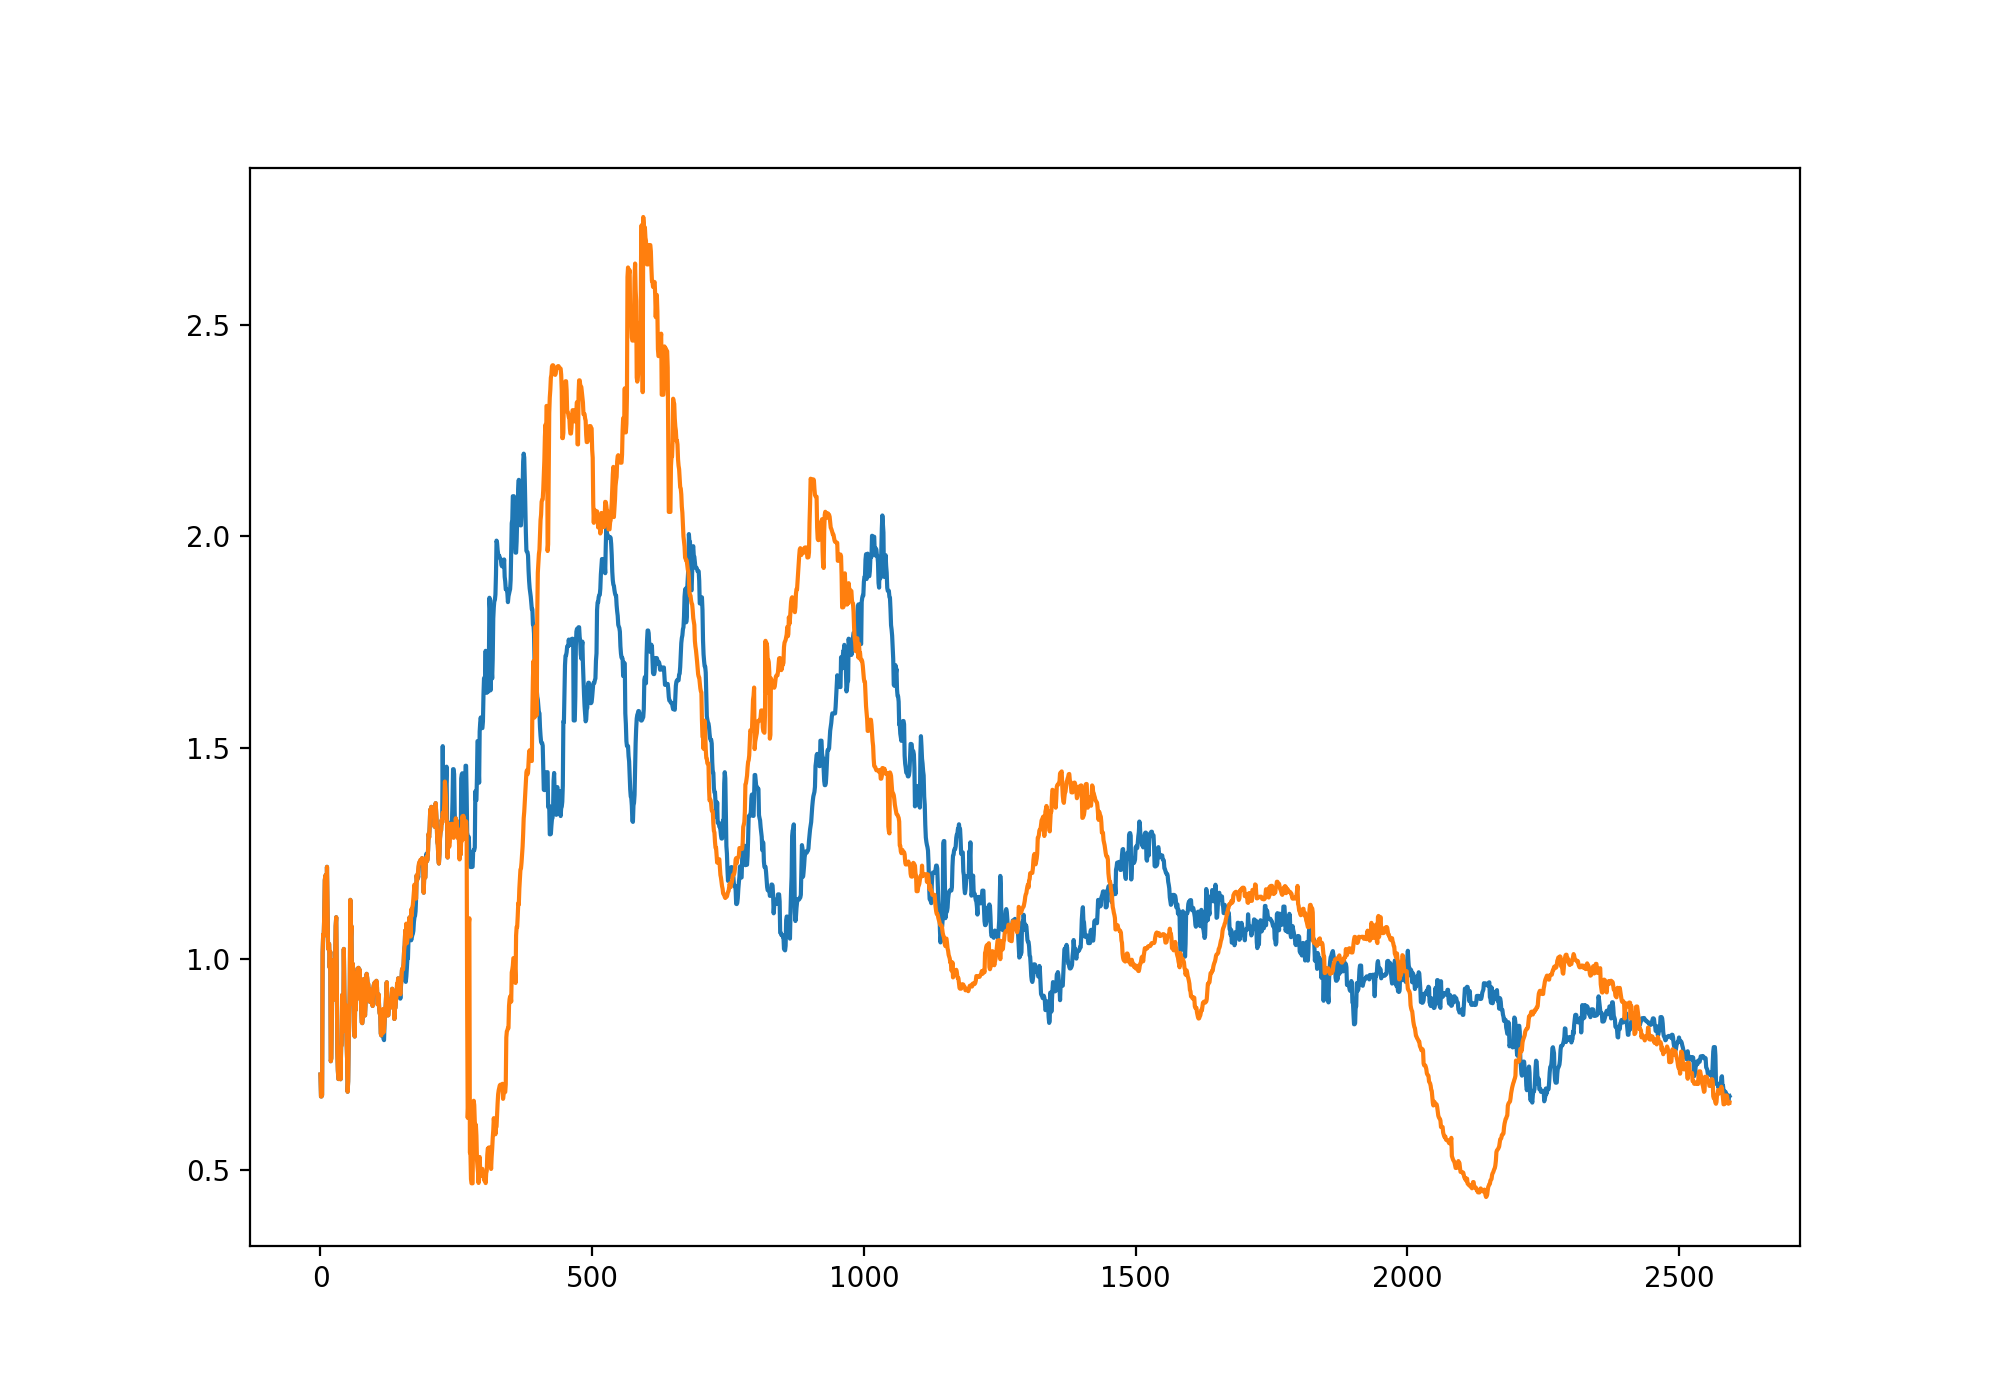

In [17]:
plt.figure(figsize = (10,7))
x_plt = numpy.median(X_SG[g0], axis = 0)
plt.plot(x_plt)
x_plt = numpy.median(X_SG[g1], axis = 0)
plt.plot(x_plt)
plt.show()